# knn
---
### 1. 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

sns.set()
%matplotlib inline

In [2]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=pd.Series(iris.target)

---
### 2. 분류 색 지정

In [3]:
def setcolor(value):
    color=[]
    colors=['r','g','b']
    for i in value.values:
        color.append(colors[i])
    return color

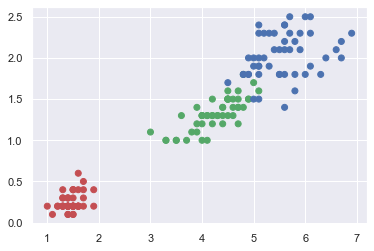

In [4]:
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
           color=setcolor(df['species']))

---
### 3. knn 모델 학습 - knn=3

In [5]:
column_train=['petal length (cm)','petal width (cm)']
nei3=KNeighborsClassifier(n_neighbors=3,weights='distance')
nei3train=nei3.fit(df[column_train],df['species'])

---
### 4. 예측

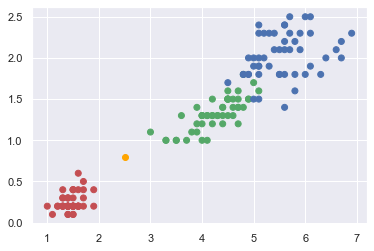

In [6]:
n_data=np.array([2.5,.8]).reshape(1,-1)
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
           color=setcolor(df['species']))
plt.scatter(x=n_data[0,0],y=n_data[0,1],color='orange')

In [7]:
nei3class=nei3train.predict(n_data)
print(nei3class)

[1]


C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


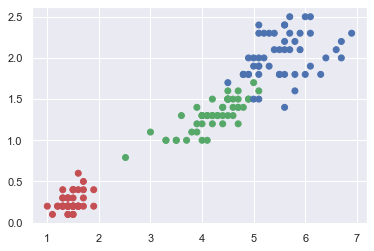

In [8]:
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
           color=setcolor(df['species']))
c3=pd.DataFrame(np.array(nei3class),columns=['c'])
col3=c3['c']
plt.scatter(x=n_data[0,0],y=n_data[0,1],color=setcolor(col3))

---
### 5. knn 모델 학습 - knn=7

In [9]:
column_train=['petal length (cm)','petal width (cm)']
nei7=KNeighborsClassifier(n_neighbors=7,weights='distance')
nei7train=nei7.fit(df[column_train],df['species'])

nei7class=nei7train.predict(n_data)
print(nei7class)

[0]


C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


---
### 6. 예측

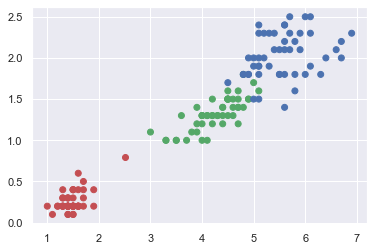

In [10]:
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
           color=setcolor(df['species']))
c7=pd.DataFrame(np.array(nei7class),columns=['c'])
col7=c7['c']
plt.scatter(x=n_data[0,0],y=n_data[0,1],color=setcolor(col7))

---
### 7. 정확도 평가하기

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
xt,xv,yt,yv = train_test_split(df[column_train],df['species'],test_size=.33)

In [13]:
neigh3=KNeighborsClassifier(n_neighbors=3,weights='distance')
neigh3.fit(xt,yt)
print(classification_report(yv,neigh3.predict(xv)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.79      0.86        19
           2       0.79      0.94      0.86        16

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50

